# Machine Learning 2023/2024

## First Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

### Imports

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB


import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
from sklearn.impute import SimpleImputer

### Loading the Dataset

In [3]:
df = pd.read_csv("Postures.csv", sep=",")
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?


In [4]:
incomplete_columns = []
cols_to_discard = []
for col in df.columns:
    proportion = (df[col] == '?').mean() * 100
    if proportion > 0:
        print (f'Proportion of missing values in column {col}: {round (proportion, 2)}%')
    if proportion > 69:
        cols_to_discard.append(col)
    else:
        incomplete_columns.append(col)
        

Proportion of missing values in column X3: 0.88%
Proportion of missing values in column Y3: 0.88%
Proportion of missing values in column Z3: 0.88%
Proportion of missing values in column X4: 4.0%
Proportion of missing values in column Y4: 4.0%
Proportion of missing values in column Z4: 4.0%
Proportion of missing values in column X5: 16.68%
Proportion of missing values in column Y5: 16.68%
Proportion of missing values in column Z5: 16.68%
Proportion of missing values in column X6: 33.1%
Proportion of missing values in column Y6: 33.1%
Proportion of missing values in column Z6: 33.1%
Proportion of missing values in column X7: 50.13%
Proportion of missing values in column Y7: 50.13%
Proportion of missing values in column Z7: 50.13%
Proportion of missing values in column X8: 60.86%
Proportion of missing values in column Y8: 60.86%
Proportion of missing values in column Z8: 60.86%
Proportion of missing values in column X9: 69.31%
Proportion of missing values in column Y9: 69.31%
Proportion o

<h3>Objective 1:<br> Produce the best regression model for critical_temp (Dependent Variable)</h3>

In [5]:
#df = df.select_dtypes(include='float64').columns
df['User'] = df['User'].astype('category')
if df.shape[0] > 78095:
    df = df.drop(0, axis = 0)
df_x = df.drop("Class", axis = 1)
for col in cols_to_discard:
    df_x = df_x.drop(col, axis = 1)
df_y = df["Class"]


In [ ]:
#df_x = df_x.replace("?", None)#, inplace=True)

In [6]:
df_x
df_x = df_x.replace('?', np.nan)
df_x

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8
1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,-46.460186,...,-43.2637900001125,-30.2822013321426,77.6223061447627,-17.15029172919,-22.8338299139098,104.593912875762,-53.1261355228787,61.4949522101345,101.205748000188,-6.54311453354464
78092,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,-17.002723,...,-46.5583729086904,-1.95850220442059,98.2889311555066,4.24833369793896,61.3900145605159,101.468284194012,-5.98537080649334,88.1772331562548,60.7806417592771,-62.1305625712145
78093,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,-53.939140,...,-6.61698844268879,-1.12573832398984,122.6140268058,-46.7960541509443,88.2910287028482,60.3627679995225,-62.7187354592767,-1.77949490376791,98.0894592678955,3.83590370588782
78094,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,-17.460853,...,-6.8409418109905,54.0099616832869,129.477879104126,-43.9678201146984,-1.58141492943602,98.0174111620326,3.39429131311924,88.4657093720691,60.0507908377745,-63.2216259324485


In [7]:
df_y

1        1
2        1
3        1
4        1
5        1
        ..
78091    5
78092    5
78093    5
78094    5
78095    5
Name: Class, Length: 78095, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values, 
                                                    df_y.values, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)


(58571, 28)
(19524, 28)


In [9]:
df["User"].unique()

[0, 1, 2, 4, 5, ..., 10, 11, 12, 13, 14]
Length: 14
Categories (14, int64): [0, 1, 2, 4, ..., 11, 12, 13, 14]

In [10]:
scaler = PowerTransformer()
scaler.fit(X_train)
Xt_train = scaler.transform(X_train)
Xt_test  = scaler.transform(X_test)

In [32]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(Xt_train)
Xt_train = imp.transform(Xt_train)
Xt_test  = imp.transform(Xt_test)

some usefull functions

In [16]:
def drawGraf(preds, title):
    plt.figure(figsize=(3,3))
    plt.scatter(preds, y_test)
    plt.plot((0, 150), (0,150), c="r")
    plt.grid()
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.title(title)
    plt.show()

In [17]:
def printAvalStat(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))

    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")

<h3>Objective<br>Produce the best binary classification model assuming...</h3>

Logistic regression classification model

In [20]:
#lrmdl = LogisticRegression(random_state=0)
#lrmdl.fit(X_crit_train_s, y_crit_train)

lrmdl = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train, y_train)

sk_preds=lrmdl.predict(Xt_test)


#b0=mdl.intercept_[0]
#b1=mdl.coef_[0][0]
#print("Intercept (b0): %7.4f"% b0) 
#print("Slope     (b1): %7.4f"% b1) 

Decision tree classifier

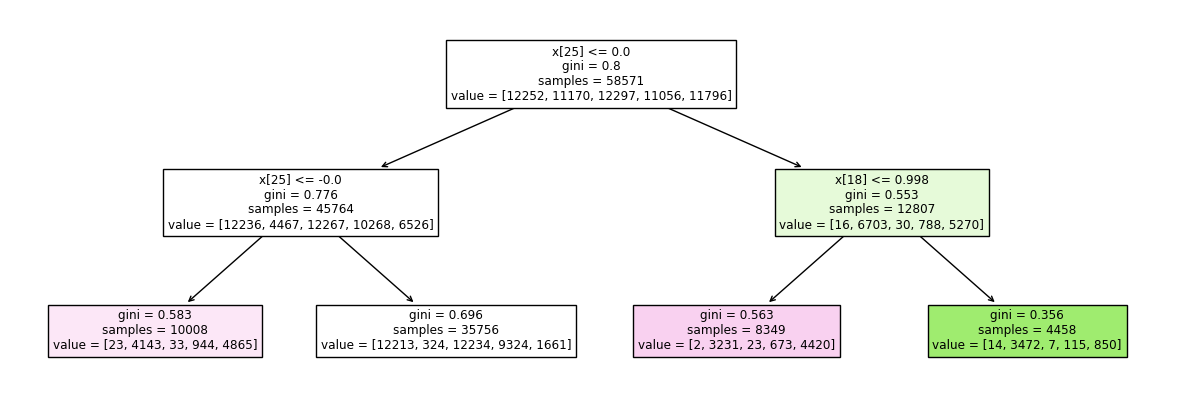

In [18]:
dt = tree.DecisionTreeClassifier(max_depth=2) #parametros no construtor
dt = dt.fit(Xt_train , y_train)

plt.figure(figsize=(15, 5))
r=tree.plot_tree(dt, filled=True)#, feature_names= df.columns)
plt.show()

In [19]:
dt_preds= dt.predict(Xt_test)

Naive Bayes classifier

K-Nearest Neighbours Classifier

In [28]:
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds, average ="weighted"))
    print("The Recall is: %7.4f" % recall_score(truth, preds, average ="weighted"))
    print("The F1 score is: %7.4f" % f1_score(truth, preds, average ="weighted"))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print("0 = negative & 1 = positive:\n")
    print(pd.DataFrame(confusion_matrix(truth, preds)))
    print("\n")

In [29]:
### Resultados da avaliação do modelo decision tree classifier ###
print("Resultados da avaliação do modelo decision tree classifier:\n")
printClassResults(y_test, dt_preds)

### Resultados da avaliação do modelo logistic regression ###
print("Resultados da avaliação do modelo logistic regression:\n")
printClassResults(y_test, sk_preds)

Resultados da avaliação do modelo decision tree classifier:

The Accuracy is:  0.4253
The Precision is:  0.3207
The Recall is:  0.4253
The F1 score is:  0.3146
The Matthews correlation coefficient is:  0.3394

This is the Confusion Matrix
0 = negative & 1 = positive:

   0     1     2  3     4
0  0     2  4004  0     7
1  0  1180   104  0  2524
2  0     3  4029  0    15
3  0    51  3103  0   565
4  0   306   537  0  3094


Resultados da avaliação do modelo logistic regression:

The Accuracy is:  0.7688
The Precision is:  0.7665
The Recall is:  0.7688
The F1 score is:  0.7671
The Matthews correlation coefficient is:  0.7111

This is the Confusion Matrix
0 = negative & 1 = positive:

      0     1     2     3     4
0  3399     8   281   143   182
1    31  3271    91   128   287
2   351    14  3165   444    73
3   237   238   442  2360   442
4   184   498   111   329  2815




C:\Users\Santini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
